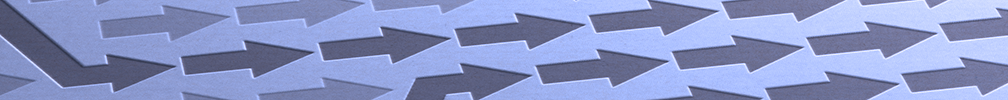
# Week 8 Overview
If you’re like most people, sorting through emails and deleting spam—advertisements, political messages, and other unwanted junk—is a regular part of your day. Automated spam blockers can help, but have you ever wondered how they decide what’s spam and what isn’t? Are they as effective as they could be? Last week, we examined ensemble methods like Bagging, Boosting, and Random Forests, which improve model accuracy by combining multiple predictions. Building on this foundation, we’ll now turn to classification, the process by which algorithms assign labels to data. From spam detection to medical diagnoses, you’ll discover how classification models make decisions, measure accuracy, and drive many of the automated systems we rely on daily.

## Key Terms
- Classification: A supervised learning technique that predicts discrete class labels (Y) from input features (X)
- Types of classification problems:
    - Binary: Classification with two possible outcomes (e.g., spam vs. not spam)
    - Multi-Class: Classification with more than two possible outcomes, where each data point is assigned one class (e.g., classifying handwritten digits 0-9)
    - Multi-Label: Classification where each data point can belong to multiple classes simultaneously (e.g., tagging photos with "dog" and "beach")
- Categorical Data: Data representing discrete categories with no inherent order (e.g., blood types A, B, AB, O)
- Ordinal Data: Categorical data with a meaningful order (e.g., grades A, B, C)
- Confusion Matrix: A table summarizing the performance of a classification model by showing true positives, false negatives, false positives, and true negatives
Metrics used in classification:
    - Accuracy: The percentage of correct predictions out of total predictions
    - Precision: The proportion of positive predictions that are actually correct
    - Recall (Sensitivity): The proportion of actual positives that are correctly identified
    - F1-Score: The harmonic mean of precision and recall, balancing their trade-off


## 8.1 Lesson: Introduction to Classification in Machine Learning
In regression, we predict continuous values, such as housing prices or temperatures. However, data science often involves predicting discrete outcomes, which can be classified into **categorical** and **ordinal** types.
- **Categorical Outcomes** select from a finite list of unordered categories or labels:
    - Binary categories: spam vs. not spam, cancer vs. no cancer
    - Political Parties: Republican, Democrat, Independent, Green
    - Blood Types: A, B, AB, O
    - State of residence: MA, VT, NY
- **Ordinal Outcomes** are also categorical but have an explicit order:
    - Class year: freshman, sophomore, junior, senior
    - Grades: 
    - Likert Scale Responses
IN general, such outcomes are called **classes** or **labels** and are encoded using integers $\{0,1, \dots, k-1\}$. For example, in a binary classification problem, the class labels will be 0 or 1. 

This brings us to an essential question: **How do we create models that output these labels?** Can we adapt regression and decision trees, or do we need an entirely new model type?

This challenge lies at the heart of **classification**, a major branch of machine learning and dedicated to predicting categorical and ordinal labels.

**Punchline:** We'll need to make significant changes to regression, but decisiont rees and ensemble methods anc be used for classification with minimal changes!

Classification is foundational in fields ranging from healthcare (identifying diseases based on symptoms) to finance (detecting fraudulent transactions). Understanding classificaiton will equip you to build models that recognize patterns and make precise decisions in realtime, impacting everyday tasks and critical decision. 

### Definitions
In machine learning, **classification** is a supervised learning technique that aims to predict class labels $Y$ from input features $X$.

There are three types of classification problems:

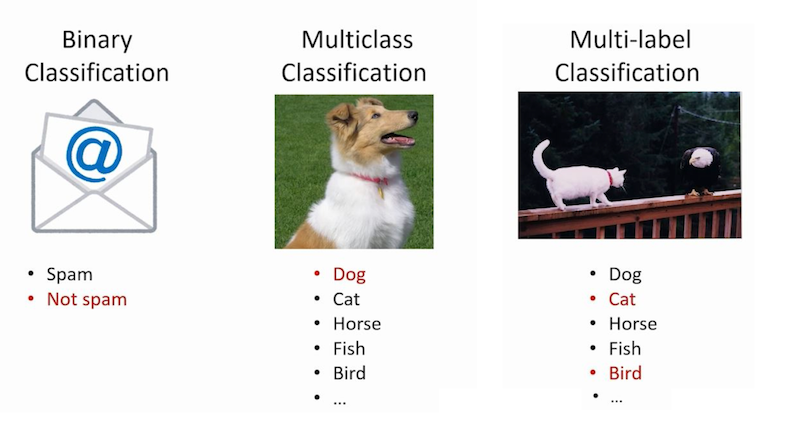

In **binary** classification, there are only two possible classes. Each data point is classified into one of two categories, often labled as "0" or "1", "positive" or "negative", or other paired lables.

**Example:** Spam blockers classify incoming emails into “spam” or “ham” (“not-spam”) based on typography (excessive use of special characters or capital letters), vocabulary (“win,” “debt-free”), common phrases (“Operators are standing by!”), header information such as addresses and domains known to send spam, and image content.

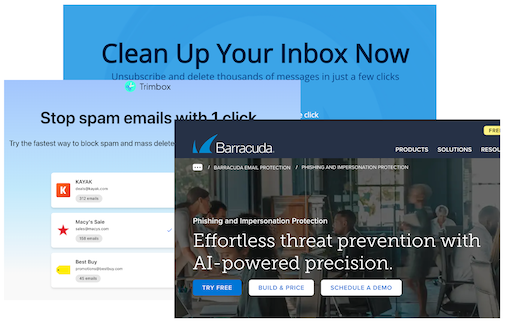

In **multi-class classification**, there are more than two classes, and each data point is assigned to exactly one of these classes.

**Example:** Recognizing handwritten digits from the MNIST dataset is often considered the “Hello World” of deep learning. The input consists of 28x28 pixel black-and-white images of digits, and the output is a label from 0 to 9.

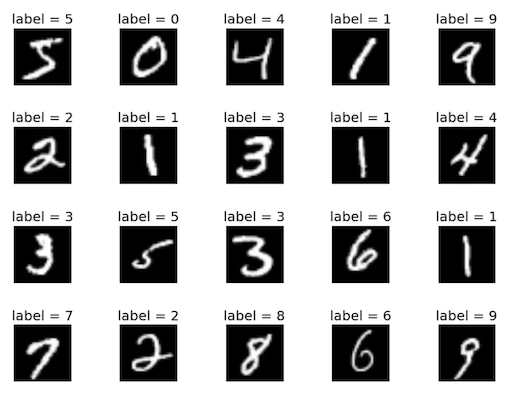

In **multi-label classification** each data point can belong to multiple classes simultaneously. This differs from multi-class classification, where each instance is assigned to just one class.

**Examples:** Photo taggers on Facebook or Instagram use a multi-label classification model trained to recognize different visual elements in the photo, allowing it to assign all appropriate tags based on the image content. This approach is widely used in content management and recommendation systems to enhance searchability and user experience by allowing images to be categorized under multiple, non-exclusive tags.

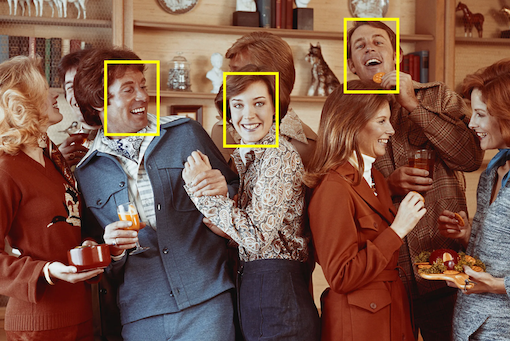

In this case $Y$ consists of vectors giving multiple labels, e.g., if the labels were `[dog, cat, horse, fish, bird]`, then an image with a dog and a bird would have the output vector `[1, 0, 0, 0, 1]` or perhaps a probability distribution of `[0.6, 0, 0, 0, 0.4]`. This type of classification often requires specialized metrics and training techniques, as traditional classification models assume one label per instance.

Think About It
- Suppose you’re developing a model to assist in medical diagnosis. Would you use binary classification (e.g., "disease" vs. "no disease"), multi-class classification (identifying a specific disease out of many), or multi-label classification (identifying multiple possible conditions for a patient)? What factors would influence your choice?
- Each type of classification requires different metrics for evaluation. Why might accuracy (the percentage of the predictions that are correct) alone be insufficient in multi-label classification, where each instance can have multiple labels?

## 8.2 Lesson: Binary Classification using Logistic Regression
For binary classification, our dataset consists of $n$ data points $x^{(i)}$ each with $m$ features and a class label $y^{(i)} \in \{0, 1\}$:

$$\begin{bmatrix}
x_1^{(1)} & x_2^{(1)} & \dots & x_m^{(1)} & y^{(1)}\\
x_1^{(2)} & x_2^{(2)} & \dots & x_m^{(2)} & y^{(2)}\\
& & \vdots\\ & &\\
x_1^{(n)} & x_2^{(n)} & \dots & x_m^{(n)} & y^{(n)}
\end{bmatrix}$$

Positive instances have $y^{(i)} = 1$ and negative instances have $y^{(i)} = 0$.

**About the notation:** There are two common ways to denote the $k^{th}$ feature (column) of the $i^{th}$ data point (row):

- In statistics and linear algebra, and more mathematical ML texts, $x_{i, k}$ is used, which comports well with matrix notation and programming notation such as $x[i][k]$ and $x[ij]$. It also fits naturally with the simple notation $x_i$ for the $i^{th}$ data point. 
- Some texts, such as our textbook ISL, use $x_{ik}$.
- In more applied ML texts, and indeed throughout most of the resources available for data science, you will see $i_k^{(i)}$, with $x^{i}$ indicating the $i^{th}$ data point (or sample) as a whole. This seems a bit easier to read unless the matrix nature of the dataset is being emphasized. This is the nation used in the textbook HOML. 

Going forward, we shall use the common second notation. 

### Why doesn't linear regression work for binary classification?
inear regression fits a line (or hyperplane) to a dataset to predict scalar outcomes. Unfortunately, this technique does not generalize to classification directly!

To see why, consider the simplistic problem of predicting gender from a person’s height. Men generally are taller than women (the average height of an American man is 5’ 9” and for women 5’ 4”), but can we use these facts to predict a person’s gender or give the probability they are one or the other?

If we simply use a $Y$ axis with two labels and draw a regression line, it does not make much sense:

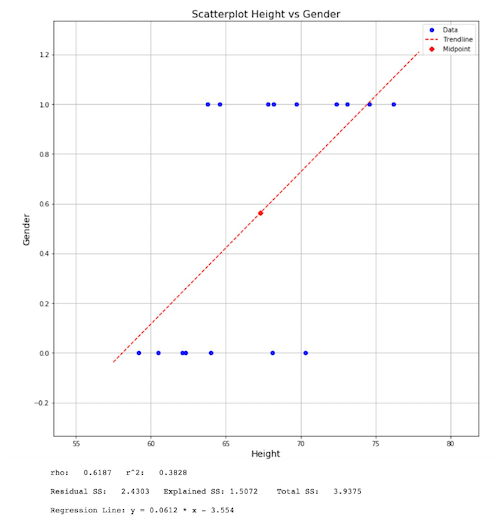

Given a new data point indicating that an individual is 65.5 inches tall, what gender would we predict? And how confident could we be in this prediction? Ideally, we’d want a probabilistic statement like, “There’s a 53% chance the individual is male.” However, the regression line does not yield probabilities—how would we interpret a prediction of -0.188 for someone 55 inches tall?

**Logistic Regression = Linear Regression + Logit Transformation**

Logistic Regression outputs the probability that the datapoint is a positive instance $(y^{(i)} = 1)$. The predictions $\widehat{Y}$ must be transformed from the floating-point numbers in the range $[- \infty \dots \infty]$ to probabilities in the range $[0 \dots 1]$

This is accomplished by using a **logit transformation** based on the **sigmoid function** $s(z)$, which creates an S-shaped curve that maps any real-valued number $z$ to a probability between 0 and 1. 

$$s(z) \quad = \quad \frac{e^z}{e^z + 1} \quad = \quad \frac{1}{1 + e^{-z}}$$

In [1]:
import numpy as np

def s(z):
    return 1 / (1 + np.exp(-z))

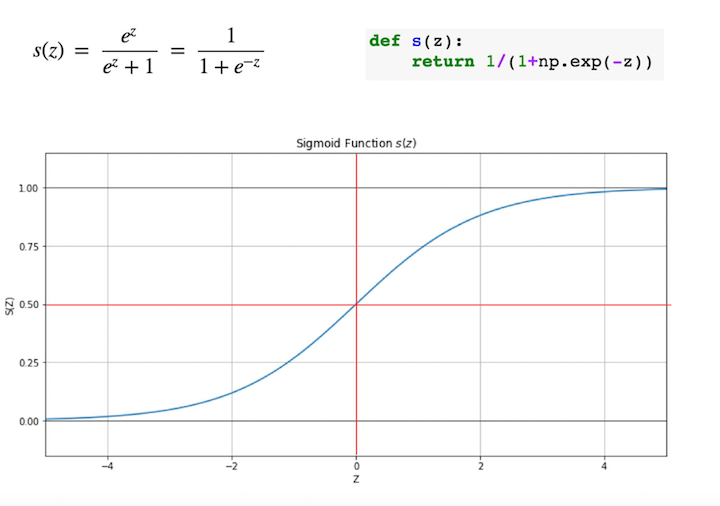

### Prediction using logistic regression
For an input $x_1^{(i)}, x_2^{(i)}, \dots , x_m^{(i)},$ logistic regression will predict the probability that the data point belongs to the positive class:

$p^{(i)} \quad = \quad P(y^{(i)} = 1)$

by computing the linear combination of the input features:

$z^{(i)} = \beta_0 + \beta_1x_i^{(i)} + \beta_2x_2^{(i)} + \dots + \beta_mx_m^{(i)}$

and then applying the sigmoid function:

$p^{(i)} \quad = \quad s(z^{(i)}) \quad = \quad \frac{1}{1 + e^{-z^{(i)}}}$

finally, we apply the **decision rule**: if $p^{(i)} \geq 0.5$, we classifiy the instance as class 1; otherwise it is classified as 0. The threshold can be adjusted depending on the problem.

## Training a Logisitic Regression Model (Optimization)
To train the logistic regression model, we aim to adjust the weights $\beta$ to minimize the differences between the predicted probabilities $p$ and the actual labels. However, the MSE doesn't align well with the logit transformation's output, which represents probabilities, so instead, we use **Cross-Entropy Loss**, which penalizes the difference between the prediction and the true label using $-\text{log}(p^{(i)})$ for positive instances and $-\text{log}(1 - p^{(i)})$ for negative instances.

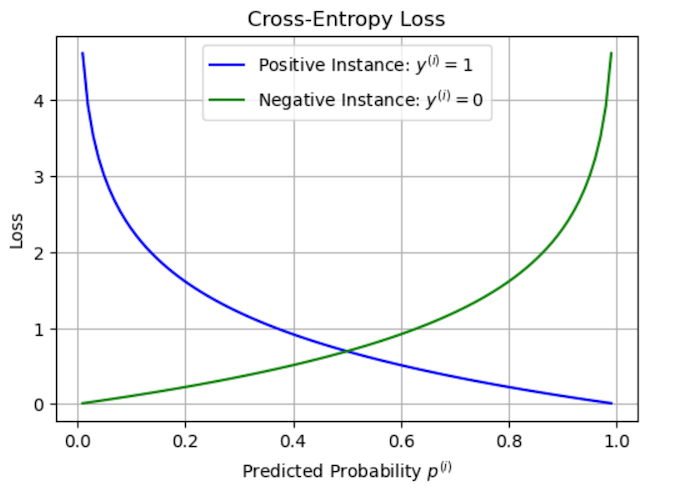

The cost function is compactly expressed as a single formulat that averages the cost over all the training instances:

$$\text{cost}(\beta) \quad = \quad - \frac{1}{n} \sum_{i = 1}^n (y^{(i)} \text{log}(p^{(i)}) + (1 - y^{(i)}) \text{log}(1 - p^{(i)})) $$

Note how, because $y^{(i)} \in \{0,1 \}$, exactly one of the terms in the inner sum is non-zero.

As discussed in week 2, we use gradient descent to minimize $cost\beta$ by iteratively updating the weights $\beta$ by moving in the direction of the negative gradient of the cost function. The updtes for each $\beta_i$ are given by:

$$\beta_j \quad = \quad \beta_j - \alpha \frac{\partial \; \text{cost} \; \beta}{\partial \beta_j}$$

Where $\alpha$ is the learning rate. 

By iteratively updating $\beta$, instead of moving a straight line to minimize the MSE. we shift and reshape the sigmoid curve as the model learns to better predict probabilities that align with the actual labels in the training data, "better" being quantified by cross-entropy loss.

### Summary
In logistic regression the sigmoid function $s(z)$ is applied to the linear output $z$ to constrain it between 0 and 1, making it interpretable as a probability. This probability is then used to make a classification decision. During training, the model learns the optimal weights by minimizing a cost function specifically designed for binary classification. 

### Think about it
- Why is Cross-Entropy Loss preferred over Mean Squared Error (MSE) for training logistic regression models? 
- How would you interpret the output of logistic regression for a data point where ﻿p equals 0.7﻿?
- In what scenarios might a threshold other than 0.5 be appropriate (e.g., fraud detection, medical diagnosis)?
- What happens to the Cross-Entropy Loss for a positive instance when the predicted probability ﻿p﻿ approaches 0?


## 8.3 Lesson: Evaluating Classification Models
In regression contexts, as explained in week 2, we use MSE, $R^2$, or another metric that quantifies how well the model returned accurate scalar predictions. However, when the output is a class label from $\{0, \dots , k-1 \}$, these metrics do not apply. Instead we emphasize **accuracy**, the percentage of data points classified correctly. However, we'll see that this is often not precise enough!

### Binary Classification Metrics
Even in binary settings, there are a lot of confounding issues to account for. Let’s consider a simple image-labeling problem: given an image, predict whether it contains a dog. There are four possible outcomes:


<center><img src="/Users/petershmorhun/Desktop/BU - Spring 25/machine_learning_fundamentals/images/bu-mod3-8.3lesson-figure1.png"></center>


and at least four common metrics that are commonly used:


<center><img src="/Users/petershmorhun/Desktop/BU - Spring 25/machine_learning_fundamentals/images/bu-mod3-8.3lesson-figure2.png"></center>


Intuitively, these measure the accuracy ("how many correct") among various categories of data points:

- **Accuracy** is the percentage of **all predictions** that we correct
- **Precision** is the percentage of **positive precitions** that were correct
- **Sensitivity** (or **Recall**) is the percentage of the **actual positives** identified correctly
- **Specificity** is the percentage of the **actual negatives** identified correctly

The idea of accuracy is fairly straightforward: how many did it get correct? This is the simplest and most commonly used metric, at least as a first approximation.

However, the others are useful in many circumstances-such as healthcare screenings-where the cost of errors may be unacceptable:

- If **positive = the patient has cancer**, then an FN is disastrous since you have misdiagnosed a deadly disease, so we want to **increase sensitivity**
- If **positive = the patient does NOT have cancer**, then an FP is disastrous since again you have missed diagnosing a deadly disease, so we want to **increase precision**.
- If a patient is screened for a rare condition that is manageable if detected early, like certain types of benign tumors, **high specificity** ensure that individuals who do not have the condition are not subjected to unnecessary testing or treatment, reducing both patient  burden and healthcare costs.
- If you are querying a database of documents, and **positive = correct document retrieved**, and you want to retrieve all possible corrected documents, then you need to increase **positive recall** (hence the name).

Precision and recall are often in conflict: increasing one will decrease the other; therefore, a composite measure is often used, the "harmonic mean" of  prediction and recall, which attempts to equalize the error between these two:

$$ F_1 \; \text{score} \; = \; \frac{2 \; \times \; \text{Precision} \;\times\:\text{Recall}}{\text{Precision}\;+\;\text{Recall}}$$

### Comparing the Accuracy of Models
Accuracy is the most commonly used metric, but it is more complex than it seems!
- Suppose you have a `spam` / `not_spam` binary classification task for emails, but your dataset is heavily unbalanced: 30% is `spam` and 70% is `not_spam`.
- You train two models: `A` gets 88% accuracy, and `B` gets 92%

How much **better** is `B` than `A`? At first glance, `B` is $ 92\% \; - \; 88\% \; = \; 4\%$ better, or perhaps $92/88 \; = \; 1.05$, so 5% better. 

Neither of these would be completely satisfactory, however the problem is that the stupidest possible model would classify all instances as `not_spam` and have 70% accuracy.

This establishes a baseline. So, `A` does 18% better than the baseline, and `B` does 22% better, and this **improvement over the baseline** is a commonly used refinement of accuracy.

A more precise version of this is **Cohen's Kappa**: how well does each of these do on the 30% that woule be due to actual improvement above the baseline?

$$ \kappa \; = \; \frac{accuracy \; - \; baseline \; accuracy}{1.0 \; - \; baseline \;accuracy}$$

According to this metric, `A` has a score $\kappa  = (.88 - .7)/(1-.7) = 0.6$ and `B` has a score $\kappa = (.92 - .7)/(1-.7)=0.73$

### Multi-Class Metrics
Confusion Matrices for more than two classes are an excellent way to see how your model is performing and what classes are being confused!

<center><img src="/Users/petershmorhun/Desktop/BU - Spring 25/machine_learning_fundamentals/images/bu-mod3-8.3lesson-figure3.png"></center>

The metrics are essentially the same, with the caveat that most metrics will be calculated for each class (each row and each column). 

- **Accuracy**: The total number of correct overall predictions
- **Precision for class k**: The number correct over all data points predicted to be in class k:

$$ Precision_k \; = \; \frac{\text{True Positives in column k}}{\text{sum of counts in column k}}$$

- **Sensitivity/Recall for class k**: The number correct over all data points predicated to be in class k:

$$ Sensitivity_k \; = \; \frac{True\;Positives\;in\;row\;k}{sum\;of\;counts\;in\;row\;k}$$

(Specificity is less used in the multi-class setting.)

To arrive at a general measure of precision and sensitivity (say to use for $F_1$), we can average these in two ways:

**Macro-averaging** gives equal weight to each class, focusing on class-level performance:

$$ Macro\;Precision \; = \; \frac{1}{c}\sum_{k=1}^cPrecision_k$$

**Micro-Averaging** gives equal weight to each instance, focusing on overall performance across all instances.

$$ Micro\;Precision \; = \; \frac{\sum^c_{k=1} \text{True Positives}_k}{\sum^c_{k=1}(\text{True Positives}_k + \text{False Positives}_k)}$$



## 8.4 Lesson: Classification using Decision Trees and Ensemble Methods
As promised at the beginning of this lesson, we can adapt tree and ensemble methods for classification with fairly minimal changes. Thus, we only emphasize what changes need to be made to move these models from the regression setting to classification.

Now would be a good time to review Weeks 6 and 7!

### Splitting Criteria: Gini Index and Entropy vs. MSE
In **regression**, decision trees typically use MSE as the criterion for splitting nodes, aiming to minimize error in continuous output values.


For **classification**, the goal is to maximize the "purity" of the nodes. Instead of MSE, we aim tominimize one of these two measures:

- **Gini Index:** Measures the likelihooed of incorrect classification if a randomly chosen order element was labeled according to the distribution in the node. It's calculated as:

$$ \text{Gini}(p) \; = \; -\sum_{k=1}^K p_k \log(p_k)$$

where $p_k$ is the proportion of class $k$ samples in the node. Minimizing the Gini index ensures that the node is "purer" because it contains samples mostly from a single class, increasing the likelihood of correct classification.

- **Entropy (or information gain):** Measures the level of disorder or uncertainty. It's calculated as:
$$ \text{Entropy}(p) \; =\; -\sum_{k=1}^K p_k\log(p_k) $$

Nodes are split to maximize information gain, or equivalently, reduce entropy, meaning each split aims to make the resulting nodes more homogenous and less uncertain. 

### Decision Boundaries in classification
- In regression, splits aim to captures linear or non-linear trends within continuous values
- In classification, splits focus on separating classes, creating decision boundaries that partition the feature space into regions corresponding to different classes. Decision boundaries may be linear or more complex functions on features. 

### Leaf Node Values: Class Labels vs. Mean Values
- For regression, the leaf nodes typically hold the mean of the target values in that node, representing the predicted value for that regionj.
- For classification, each leaf node instead assigns a class label, typically based on the majority class within that node. 

### Ensemble Methods in Classification: Adjusting for Voting
- In Regression, ensemble methods like bagging and boosting use averaging to combine predictions
- In classification:
    - Bagging (e.g., Ranodm Forests) uses majority voting among trees to decide the final class label.
    - Boosting (e.g., AdaBoost, Gradient Boosting) sequentially focuses on misclassified instances and combines classifiers based on a weighted voting system, emphasizing classifiers with better performance on the training est.

### Class probability estimates
Unlike regression, where predictions are continuous values, classificaiton models can also provide class probabilities. In decision trees, this is often calculated based on the proportion of samples for each clas in the leaf nodes, giving probabilities rather than hard labels. 

<center><img src="/Users/petershmorhun/Desktop/BU - Spring 25/machine_learning_fundamentals/images/bu-mod3-8.4lesson-figure1.png"></center>

### Summary
To adapt decision trees and ensemble methods for classification, the primary changes involve:
- Using the Gini Index or Entropy as splitting criteria
- Assigning majority class labels in leaf nodes
- Evaluating models with classification metrics like accuracy and F1-score
- Applying voting instead of averaging in ensemble methods

These adaptations allow decision trees and ensembles to perform effectively in classification tasks. They separate instances into distinct classes and enable more nuanced evaluation.